# Covid-19 Confirmed, Deaths and Recovered Cases

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import folium

In [6]:

#import into dataframe
df1 = pd.read_csv("covid_19_data.csv")
df1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
#convert the datatypes
df1['Confirmed']=df1['Confirmed'].astype("int")
df1['Deaths']=df1['Deaths'].astype("int")
df1['Recovered']=df1['Recovered'].astype("int")
df1.dtypes

SNo                 int64
ObservationDate    object
Province/State     object
Country/Region     object
Last Update        object
Confirmed           int32
Deaths              int32
Recovered           int32
dtype: object

In [8]:
df1.describe()

,SNo,Confirmed,Deaths,Recovered
count,6162.000000,6162.000000,6162.000000,6162.000000
mean,3081.500000,588.957481,18.960240,220.271503
std,1778.960511,4908.724815,198.962911,2466.089672
min,1.000000,0.000000,0.000000,0.000000
25%,1541.250000,2.000000,0.000000,0.000000
50%,3081.500000,11.000000,0.000000,0.000000
75%,4621.750000,100.000000,1.000000,12.000000
max,6162.000000,67798.000000,3099.000000,55142.000000


In [9]:
df1.isnull().any() #find null columns
print(df1[df1['Province/State'].isnull()])

       SNo ObservationDate Province/State                    Country/Region  \
35      36      01/22/2020            NaN                             Japan   
36      37      01/22/2020            NaN                          Thailand   
37      38      01/22/2020            NaN                       South Korea   
73      74      01/23/2020            NaN                             Japan   
74      75      01/23/2020            NaN                          Thailand   
75      76      01/23/2020            NaN                       South Korea   
76      77      01/23/2020            NaN                         Singapore   
77      78      01/23/2020            NaN                       Philippines   
78      79      01/23/2020            NaN                          Malaysia   
79      80      01/23/2020            NaN                           Vietnam   
80      81      01/23/2020            NaN                         Australia   
81      82      01/23/2020            NaN           

In [10]:
df2 = df1.drop(['Province/State','Last Update'],axis='columns')
df2.head()

,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1,0,0
1,2,01/22/2020,Mainland China,14,0,0
2,3,01/22/2020,Mainland China,6,0,0
3,4,01/22/2020,Mainland China,1,0,0
4,5,01/22/2020,Mainland China,0,0,0


In [11]:
df2['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [12]:
df2['Country/Region'] = df2['Country/Region'].apply(lambda x: 'China' if x=='Mainland China' else x)
df2['Country/Region'] = df2['Country/Region'].apply(lambda x: 'United States' if x=='US' else x)
df2['Country/Region'] = df2['Country/Region'].apply(lambda x: 'United Kingdom' if x=='UK' else x)
df2['Country/Region'] = df2['Country/Region'].apply(lambda x: 'Bahamas, The' if x=='The Bahamas' else x)
df2['Country/Region'] = df2['Country/Region'].apply(lambda x: 'St. Martin' if x=="('St. Martin',)" else x)

df2.tail()

,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
6157,6158,03/16/2020,United Kingdom,1,1,0
6158,6159,03/16/2020,United Kingdom,1,0,1
6159,6160,03/16/2020,Australia,0,0,0
6160,6161,03/16/2020,United States,0,0,0
6161,6162,03/16/2020,occupied Palestinian territory,0,0,0


In [13]:
df3 = pd.read_csv("Country Codes.csv")


In [14]:
df4 = df2.merge(df3, how='left')
df4.head()

,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Code
0,1,01/22/2020,China,1,0,0,CHN
1,2,01/22/2020,China,14,0,0,CHN
2,3,01/22/2020,China,6,0,0,CHN
3,4,01/22/2020,China,1,0,0,CHN
4,5,01/22/2020,China,0,0,0,CHN


In [15]:
df4['Country/Region'].nunique()


170

In [16]:
df4['Code'].isnull().sum()


198

In [17]:
df4[df4['Code'].isnull()]['Country/Region'].unique()



array(['South Korea', 'Ivory Coast', 'Others', 'North Macedonia',
       ' Azerbaijan', 'North Ireland', 'Saint Barthelemy', 'Palestine',
       'Vatican City', 'French Guiana', 'Martinique',
       'Republic of Ireland', 'St. Martin',
       'occupied Palestinian territory', 'Channel Islands', 'Holy See',
       'Congo (Kinshasa)', 'Reunion', 'Guadeloupe', 'Eswatini',
       'Congo (Brazzaville)', 'Mayotte', 'Republic of the Congo'],
      dtype=object)

In [74]:
#df5 = pd.DataFrame(data=df4.groupby(['Code'])['Confirmed'].sum())
df5 = df4.groupby(['Country/Region','Code'])['Confirmed'].sum().to_frame().reset_index()
df5.head()


,Country/Region,Code,Confirmed
0,Afghanistan,AFG,95
1,Albania,ALB,211
2,Algeria,DZA,340
3,Andorra,AND,16
4,Antigua and Barbuda,ATG,4


In [76]:
df5[df5['Country/Region']=='China']

,Country/Region,Code,Confirmed
30,China,CHN,2958465


In [77]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

fig = go.Figure(data=go.Choropleth(
    locations = df5['Code'],
    z = df5['Confirmed'],
    text = df5['Country/Region'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Confirmed'
))

fig.update_layout(
    title_text='Covid-19 Confirmed Cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [86]:
df6 = df4.groupby(['ObservationDate'])['Confirmed','Deaths','Recovered'].sum().reset_index()

Text(0.5,1,'Covid-19 Confirmed, Deaths and Recovered Cases by Observation Date')

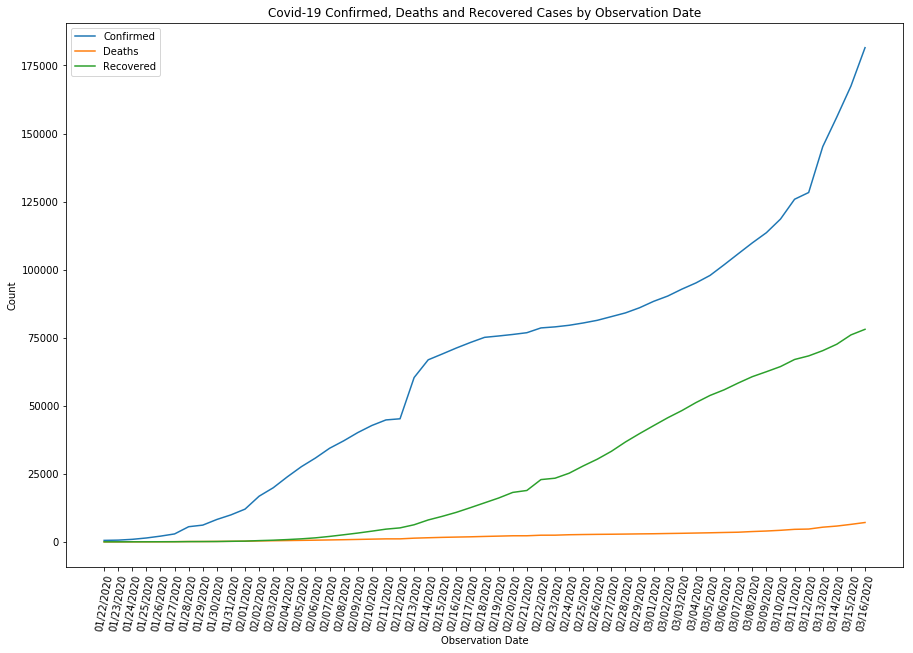

In [104]:
plt.figure(figsize=(15,10))
plt.plot(df6['ObservationDate'],df6['Confirmed'])
plt.plot(df6['ObservationDate'],df6['Deaths'])
plt.plot(df6['ObservationDate'],df6['Recovered'])
plt.legend()
plt.xlabel('Observation Date')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.title('Covid-19 Confirmed, Deaths and Recovered Cases by Observation Date')